In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
from src.utils import listdir
from src.neural_transfer import image_loader, imshow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 256 if torch.cuda.is_available() else 128  # use small size if no gpu

In [2]:
# Load input images
conditions = ["face", "scene", "bodypart", "object"]
condition_imgs = {c: [] for c in conditions}
for condition in conditions:
    path = "../stimuli/" + condition
    images = listdir(path)
    condition_imgs[condition] = [img.split('/')[-1] for img in images]
#     for im in images:
#         img = image_loader(im, imsize, device)
#         plt.figure()
#         imshow(img, title=im)

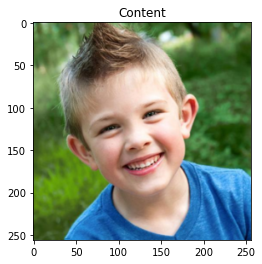

2500 0.5146980285644531 0.4856507480144501 0.02904726006090641


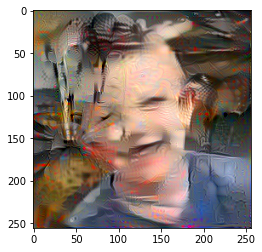

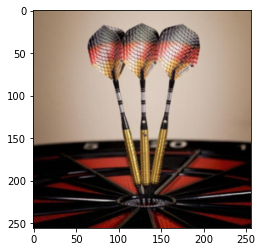

2500 0.37339675426483154 0.35388657450675964 0.019510190933942795


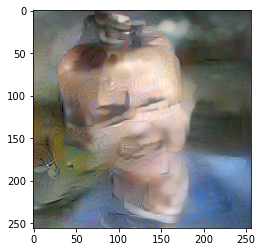

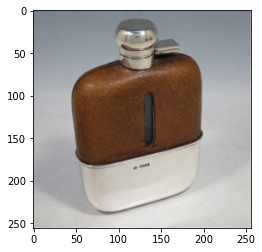

2500 0.27332794666290283 0.2596629559993744 0.013664990663528442


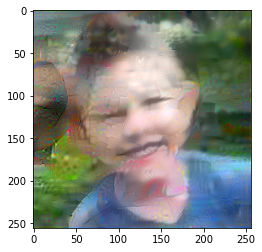

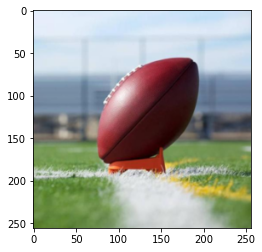

2500 0.2662167251110077 0.2385234832763672 0.02769325114786625


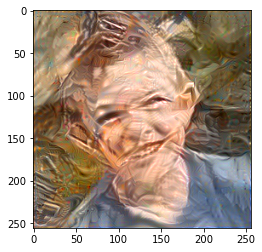

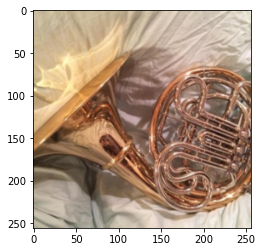

2500 0.20904509723186493 0.1911948025226593 0.01785029098391533


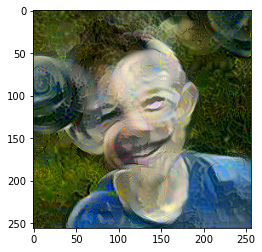

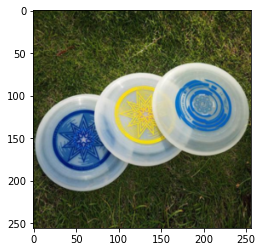

In [14]:

# Load checkpoint image
style_condition = "object"
content_condition = "face"
content_img = "stim030.bmp"
style_imgs = condition_imgs[style_condition]

img = image_loader("../stimuli/" + content_condition + "/" + content_img, imsize, device)
plt.figure()
imshow(img, title="Content")

for style_img in style_imgs:
    try:
        checkpoint = torch.load("../results/adversary/" + style_img + "_" +
                                content_img + "_pool_5.pt")
        output_run = checkpoint['run']
        output_loss = checkpoint['loss']
        output_style = checkpoint['style_score']
        output_content = checkpoint['content_score']
        output = checkpoint['input_img']
    #     with torch.no_grad():
    #         output.clamp_(0, 1)

    #     output_BGR = output.requires_grad_(False)
    #     output = output_BGR[:, (2, 1, 0), :, :]

        print(output_run, output_loss, output_style, output_content)
        plt.figure()
        imshow(output)

        img = image_loader("../stimuli/" + style_condition + "/" + style_img, imsize, device)
        plt.figure()
        imshow(img)
    except FileNotFoundError:
        continue


In [ ]:
# Load output images
style_condition = "face"
content_img = "stim076.bmp"
style_imgs = condition_imgs[style_condition]

for style_img in style_imgs:
    img = np.load("../results/adversary/" + style_img + "_stim076.bmp_pool_5_3000.npy")[
        0, :, :, :
    ]
    img = np.swapaxes(img, 0, 1)
    img = np.swapaxes(img, 1, 2)
    plt.figure()
    plt.imshow(img)
    
    img = image_loader("../stimuli/" + style_condition + "/" + style_img, imsize, device)
    plt.figure()
    imshow(img, title=im)

In [ ]:
img = np.load("../results/adversary/face_stim129.2400x2400.jpeg_pool_2_500.npy")[
    0, :, :, :
]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)

In [ ]:
img = np.load("../results/adversary/stim129.2400x2400.jpeg_face_pool_2_500.npy")[
    0, :, :, :
]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)

In [ ]:
good_images = ["almond", "aloe", "alpaca", "apple_tree", "face", "arm"]

for c in conds:
    if c.split("/")[-1] in good_images:
        style_img = image_loader(src.utils.listdir(c)[0])

        plt.figure()
        imshow(style_img, title="Style Image")


img = np.load("../scripts/almond_pool_5_1000.npy")[0, :, :, :]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)

img = np.load("../scripts/aloe_pool_5_2000.npy")[0, :, :, :]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)


img = np.load("../scripts/alpaca_pool_5_2000.npy")[0, :, :, :]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)

img = np.load("../scripts/apple_tree_pool_5_1000.npy")[0, :, :, :]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)

img = np.load("../scripts/face_pool_5_1000.npy")[0, :, :, :]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)


img = np.load("../scripts/arm_pool_5_1000.npy")[0, :, :, :]
img = np.swapaxes(img, 0, 1)
img = np.swapaxes(img, 1, 2)
plt.figure()
plt.imshow(img)

In [ ]:
# image = loader(Image.open("./Images/pebbles.jpg")).unsqueeze(0)
image = loader(Image.open(src.utils.listdir(conds[0])[1])).unsqueeze(0)
imgBGR = image[:, (2, 1, 0), :, :]
style_img_BGR = imgBGR.to(device, torch.float)
style_img_BGR.shape